In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def plot_performance_drop_msmarco(performances_wacky, performances_random, title=""):
    thresholds = performances_wacky.keys()
    threshold_ints = [int(t) if t != 'all' else 30000 for t in thresholds]

    def aggregate(data, metric):
        means = []
        stds = []
        thresholds_list = [threshold for threshold in data['0'].keys()]
        runs = [run for run in data]
        for threshold in thresholds_list:
            vals = [data[run][threshold][metric] for run in runs if threshold in data[run] and metric in data[run][threshold]]
            if len(vals) == 0:
                means.append(np.nan)
                stds.append(np.nan)
            else:
                means.append(np.mean(vals))
                stds.append(np.std(vals))
        return np.array(means), np.array(stds)

    mrr_mean, mrr_std = aggregate(performances_random, 'mrr_10')
    recall10_mean, recall10_std = aggregate(performances_random, 'recall_10')
    recall100_mean, recall100_std = aggregate(performances_random, 'recall_100')
    recall1000_mean, recall1000_std = aggregate(performances_random, 'recall_1000')

    fig = plt.figure(figsize=(17, 4))

    plt.subplot(1, 4, 1)
    plt.plot(threshold_ints, [performances_wacky[t]['mrr_10'] for t in thresholds], label='wacky tokens', color='tab:blue')
    plt.plot(threshold_ints, mrr_mean, label='random mean', color='tab:orange')
    plt.fill_between(threshold_ints, mrr_mean - 2 * mrr_std, mrr_mean + 2 * mrr_std, color='tab:orange', alpha=0.2, label='random ±2σ')
    plt.grid()
    plt.ylabel('MRR@10', fontsize=14)
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(threshold_ints, [performances_wacky[t]['recall_10'] for t in thresholds], label='wacky tokens', color='tab:blue')
    plt.plot(threshold_ints, recall10_mean, label='random mean', color='tab:orange')
    plt.fill_between(threshold_ints, recall10_mean - 2 * recall10_std, recall10_mean + 2 * recall10_std, color='tab:orange', alpha=0.2, label='random ±2σ')
    plt.grid()
    plt.ylabel('Recall@10', fontsize=14)
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(threshold_ints, [performances_wacky[t]['recall_100'] for t in thresholds], label='wacky tokens', color='tab:blue')
    plt.plot(threshold_ints, recall100_mean, label='random mean', color='tab:orange')
    plt.fill_between(threshold_ints, recall100_mean - 2 * recall100_std, recall100_mean + 2 * recall100_std, color='tab:orange', alpha=0.2, label='random ±2σ')
    plt.grid()
    plt.ylabel('Recall@100', fontsize=14)
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(threshold_ints, [performances_wacky[t]['recall_1000'] for t in thresholds], label='wacky tokens', color='tab:blue')
    plt.plot(threshold_ints, recall1000_mean, label='random mean', color='tab:orange')
    plt.fill_between(threshold_ints, recall1000_mean - 2 * recall1000_std, recall1000_mean + 2 * recall1000_std, color='tab:orange', alpha=0.2, label='random ±2σ')
    plt.grid()
    plt.ylabel('Recall@1000', fontsize=14)
    plt.legend()

    plt.suptitle(title, fontsize=16)
    fig.text(0.5, 0.04, 'Number of Removed Tokens', ha='center', va='center', fontsize=14)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

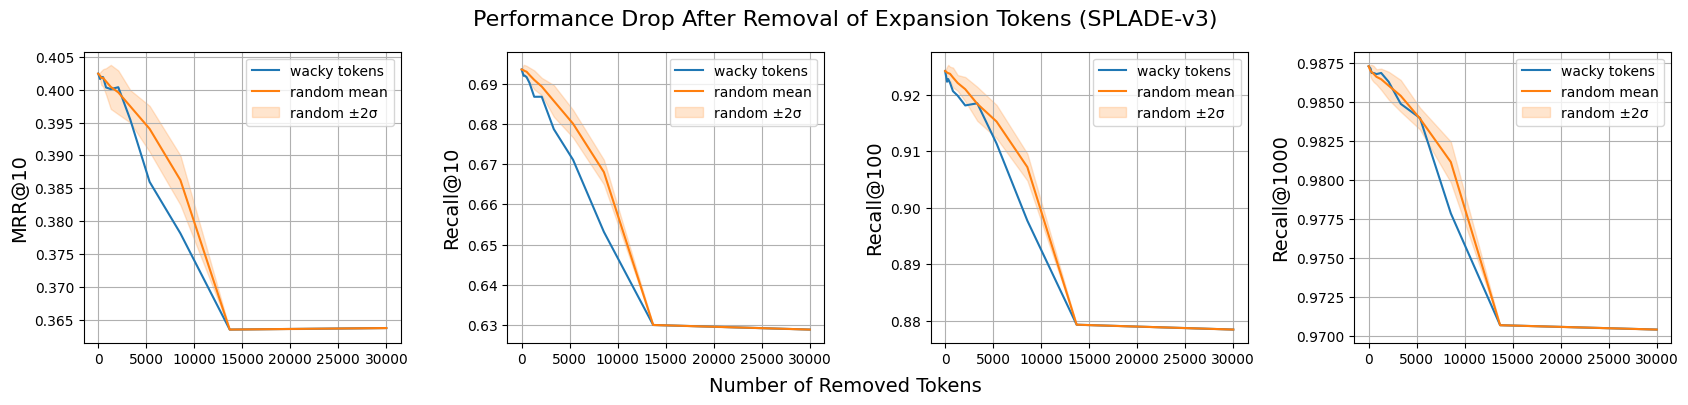

In [ ]:
performances_wacky_v3 = json.load(open('experiments/impact_on_retrieval_performance/splade_v3_performance_drop_wacky_tokens.json', 'r'))
performances_random_v3 = json.load(open('experiments/impact_on_retrieval_performance/splade_v3_performance_drop_random_tokens.json', 'r'))

plot_performance_drop_msmarco(performances_wacky_v3, performances_random_v3, title='Effectiveness After Removal of Expansion Tokens (SPLADE-v3)')

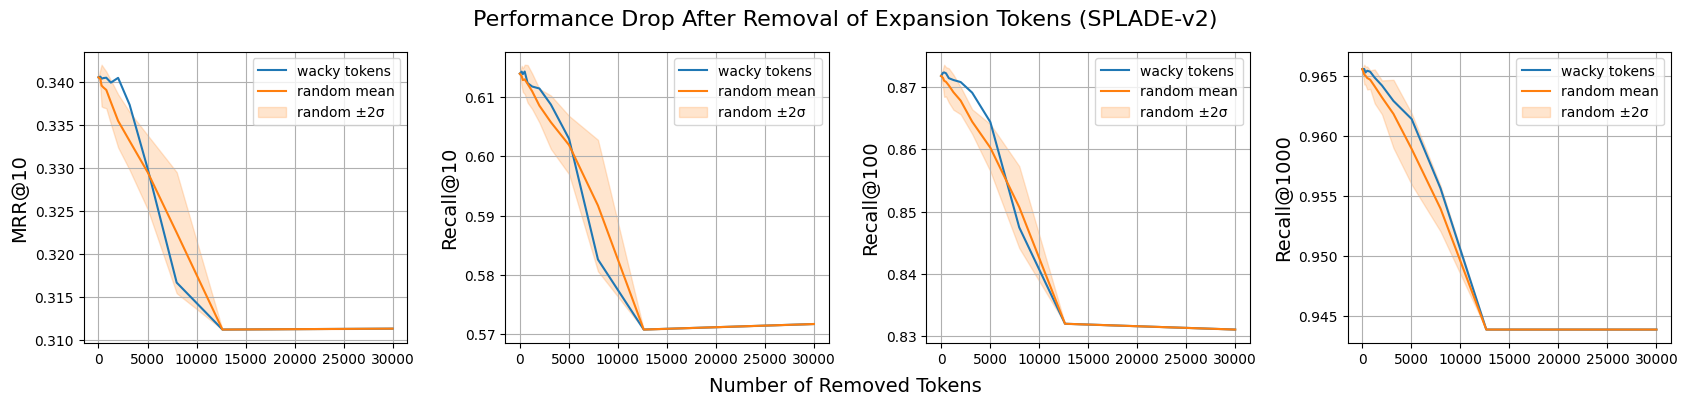

In [ ]:
performances_wacky_v2 = json.load(open('experiments/impact_on_retrieval_performance/splade_v2_performance_drop_wacky_tokens.json', 'r'))
performances_random_v2 = json.load(open('experiments/impact_on_retrieval_performance/splade_v2_performance_drop_random_tokens.json', 'r'))

plot_performance_drop_msmarco(performances_wacky_v2, performances_random_v2, title='Effectiveness After Removal of Expansion Tokens (SPLADE-v2)')

In [16]:
def plot_performance_drop_beir(beir_results_wacky_tokens, beir_results_random, title=""):
    def agg_beir(data, dataset, metric):
        means = []
        stds = []
        thresholds = [threshold for threshold in data[dataset]['0'].keys()]
        runs = [run for run in data[dataset]]
        for threshold in thresholds:
            vals = [data[dataset][run][threshold][metric] for run in runs if threshold in data[dataset][run] and metric in data[dataset][run][threshold]]
            if len(vals) == 0:
                means.append(np.nan)
                stds.append(np.nan)
            else:
                means.append(np.mean(vals))
                stds.append(np.std(vals))
        return np.array(means), np.array(stds)

    dataset_titles = [
        "ArguAna", "Climate-FEVER", "DBPedia-Entity", "FiQA-2018", 
        "NFCorpus", "Quora", "SCIDOCS", "SciFact", 
        "TREC-COVID", "Touché-2020"
    ]

    fig, axes = plt.subplots(2, 5, figsize=(17, 6))
    axes = axes.flatten()

    for i, dataset in enumerate(beir_results_wacky_tokens.keys()):
        if i >= len(axes): break 
        
        ax = axes[i]
        thresholds = [threshold for threshold in beir_results_wacky_tokens[dataset].keys()]
        threshold_ints = [int(threshold) if threshold != "all" else 30000 for threshold in thresholds]
        performances = [beir_results_wacky_tokens[dataset][threshold]['ndcg_10'] for threshold in thresholds]
        
        ax.plot(threshold_ints, performances, label='Wacky Expansion Tokens Removed', color='tab:blue')
        
        ax.axhline(y=beir_results_wacky_tokens[dataset]['all']['ndcg_10'], linestyle='--', label='All Expansion Tokens Removed', color='r')
        ax.axhline(y=beir_results_wacky_tokens[dataset][str(0)]['ndcg_10'], linestyle='--', label='Baseline (SPLADE-v3)', color='g')
        
        curr_dataset_random_means, curr_dataset_random_stds = agg_beir(beir_results_random, dataset, 'ndcg_10')
        curr_dataset_random_means = np.insert(curr_dataset_random_means, 0, beir_results_wacky_tokens[dataset]['0']['ndcg_10'])
        curr_dataset_random_stds = np.insert(curr_dataset_random_stds, 0, 0.0)
        
        ax.plot(threshold_ints, curr_dataset_random_means, label='Random Expansion Tokens Removed Mean', color='tab:orange')
        ax.fill_between(threshold_ints, curr_dataset_random_means - 2 * curr_dataset_random_stds, 
                        curr_dataset_random_means + 2 * curr_dataset_random_stds, 
                        color='tab:orange', alpha=0.2, label='Random Expansion Tokens Removed ±2σ')
        
        ax.grid()
        ax.set_ylabel('NDCG@10')
        
        if i < len(dataset_titles):
            ax.set_title(dataset_titles[i])
        else:
            ax.set_title(dataset)

    plt.suptitle(title, fontsize=16, y=0.96)

    fig.text(0.5, 0.08, '# Tokens Removed', ha='center', va='center', fontsize=14)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, 0.01), frameon=False)

    plt.tight_layout(rect=[0, 0.1, 1, 0.97])
    plt.show()

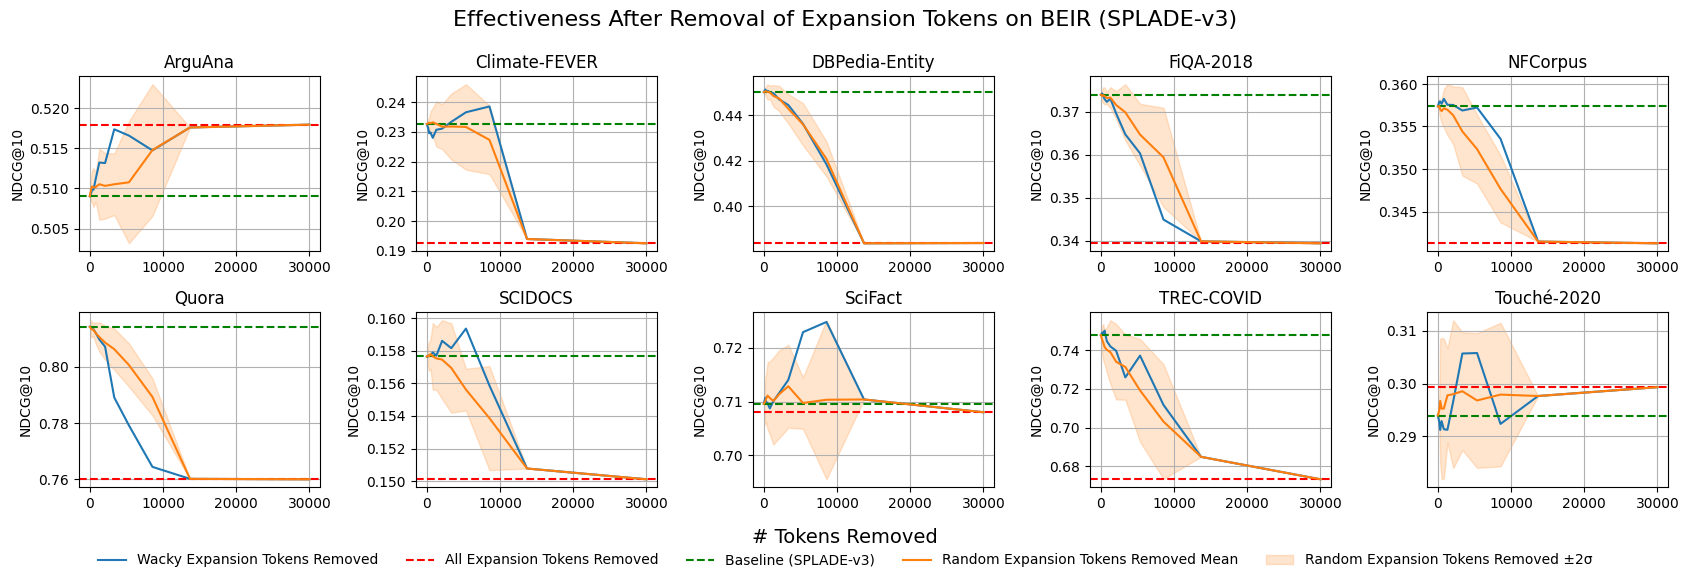

In [17]:
beir_results_wacky_v3 = json.load(open('experiments/impact_on_retrieval_performance/splade_v3_performance_drop_wacky_tokens_beir.json', 'r'))
beir_results_random_v3 = json.load(open('experiments/impact_on_retrieval_performance/splade_v3_performance_drop_random_tokens_beir.json', 'r'))

plot_performance_drop_beir(beir_results_wacky_v3, beir_results_random_v3, title='Effectiveness After Removal of Expansion Tokens on BEIR (SPLADE-v3)')


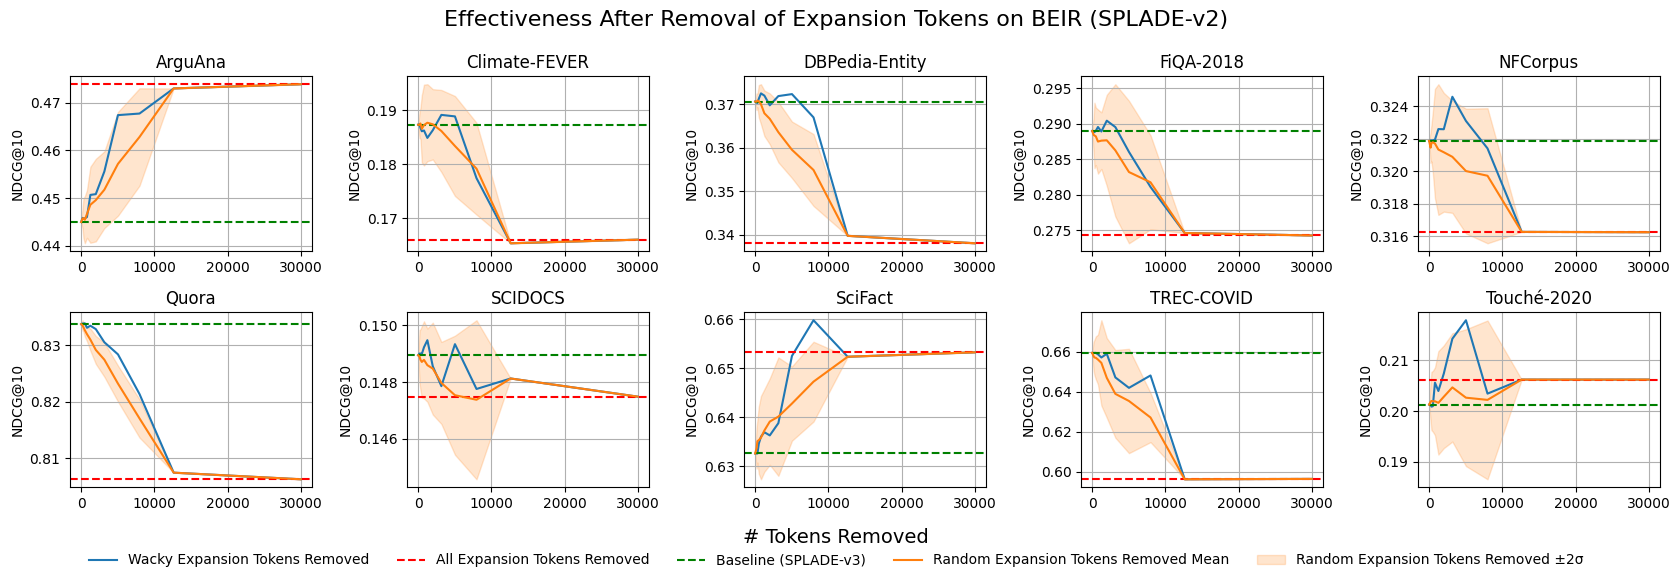

In [18]:
beir_results_wacky_v2 = json.load(open('experiments/impact_on_retrieval_performance/splade_v2_performance_drop_wacky_tokens_beir.json', 'r'))
beir_results_random_v2 = json.load(open('experiments/impact_on_retrieval_performance/splade_v2_performance_drop_random_tokens_beir.json', 'r'))

plot_performance_drop_beir(beir_results_wacky_v2, beir_results_random_v2, title='Effectiveness After Removal of Expansion Tokens on BEIR (SPLADE-v2)')